In [2]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import dynamic_inverse_kinematics_objectives, draw_dynamic_solutions
from idea import dynamic_IDEA

In [3]:
rectangles = [((0.4, 2.), (5., 4.)), ((-5., 2.), (-0.8, 4.)), ((-0.5, 2.), (0.1, 4.)),
              ((-5., 5.), (-0.3, 6.)), ((-0.1, 5.), (5., 6.))]
rectangle_vs = [(0., 0.)] * len(rectangles)
target = (1., 8.)
target_v = (-0.25, 0.)
S = [0.7] * 10 + [0.3] * 10
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 9

objective = dynamic_inverse_kinematics_objectives(S, target, target_v, rectangles, rectangle_vs)
n_constraints = len(rectangles)

n = 600
n_inf = int(0.7*n)
eta_c = 3.
eta_m = 20.
p_c = 0.9
p_m = 0.05
num_iterations_init = 200
num_iterations = 40

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, n_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, log_interval=20)

t=0
Iteration 0, #feasible: 273, best: [37.45910899], #infeasible: 327, best: [12.14874583  1.        ]
Iteration 20, #feasible: 180, best: [18.78397898], #infeasible: 420, best: [0.51131176 1.        ]
Iteration 40, #feasible: 180, best: [10.24876218], #infeasible: 420, best: [0.00246588 1.        ]
Iteration 60, #feasible: 180, best: [9.81364244], #infeasible: 420, best: [5.00947957e-06 1.00000000e+00]
Iteration 80, #feasible: 180, best: [9.26771963], #infeasible: 420, best: [5.00947957e-06 1.00000000e+00]
Iteration 100, #feasible: 180, best: [1.39091212], #infeasible: 420, best: [5.00947957e-06 1.00000000e+00]
Iteration 120, #feasible: 180, best: [0.05044339], #infeasible: 420, best: [1.89772067e-06 1.00000000e+00]
Iteration 140, #feasible: 180, best: [0.01280697], #infeasible: 420, best: [2.32772313e-08 1.00000000e+00]
Iteration 160, #feasible: 180, best: [0.00385345], #infeasible: 420, best: [2.40380363e-09 1.00000000e+00]
Iteration 180, #feasible: 180, best: [0.00082176], #infeas

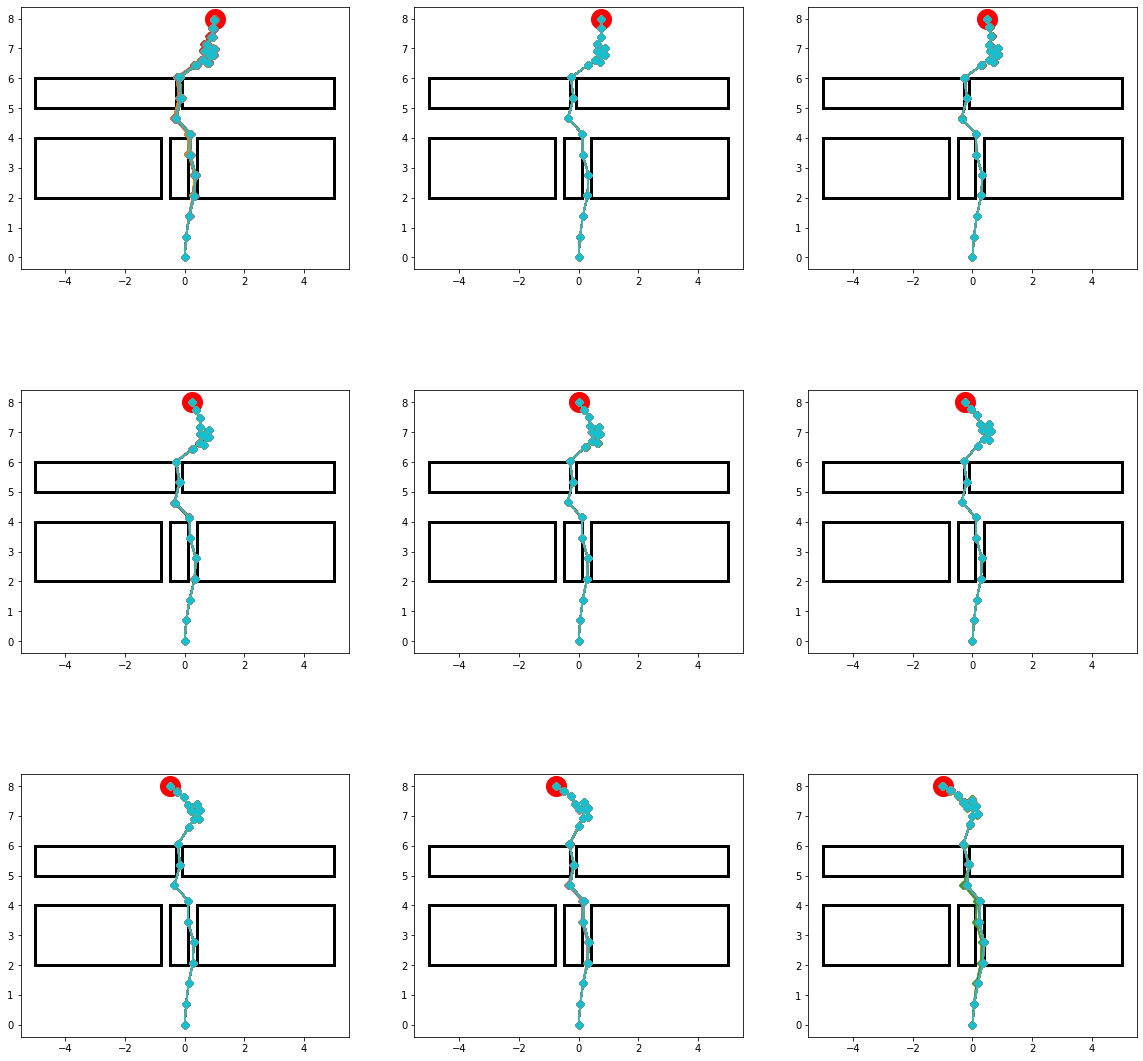

In [4]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1, :, 1] == 0.
    feasible_population = populations[-1, mask, :]
    feasible_populations.append(feasible_population)
    
draw_dynamic_solutions(feasible_populations, S, target, target_v, rectangles, rectangle_vs, np.arange(T), 
                       nrows=3, ncols=3, figsize=(20, 20))

In [15]:
rectangles = [((1.5, 2.), (7., 4.)), ((-7., 2.), (-0.3, 4.)), ((0., 2.), (1.2, 4.)),
              ((-7., 5.), (-1.3, 6.)), ((-0.9, 5.), (5., 7.))]
rectangle_vs = [(-0.2, 0.)] * 3 + [(0.2, 0.)] * 2
target = (1., 8.)
target_v = (0., 0.)
S = [0.7] * 15 + [0.3] * 10
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 12

objective = dynamic_inverse_kinematics_objectives(S, target, target_v, rectangles, rectangle_vs)
n_constraints = len(rectangles)

n = 800
n_inf = int(0.8*n)
eta_c = 3.
eta_m = 20.
p_c = 0.9
p_m = 0.1
num_iterations_init = 300
num_iterations = 240

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, n_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, log_interval=20)

t=0
Iteration 0, #feasible: 290, best: [36.66265818], #infeasible: 510, best: [7.0638879 1.       ]
Iteration 20, #feasible: 160, best: [31.12952908], #infeasible: 640, best: [0.00316888 1.        ]
Iteration 40, #feasible: 160, best: [29.844905], #infeasible: 640, best: [1.96639232e-04 1.00000000e+00]
Iteration 60, #feasible: 160, best: [25.66492755], #infeasible: 640, best: [1.23368153e-05 1.00000000e+00]
Iteration 80, #feasible: 160, best: [24.08148933], #infeasible: 640, best: [1.23368153e-05 1.00000000e+00]
Iteration 100, #feasible: 160, best: [22.46076321], #infeasible: 640, best: [5.81194378e-08 1.00000000e+00]
Iteration 120, #feasible: 160, best: [0.69282928], #infeasible: 640, best: [1.83582762e-09 1.00000000e+00]
Iteration 140, #feasible: 160, best: [0.44375191], #infeasible: 640, best: [2.04609794e-10 1.00000000e+00]
Iteration 160, #feasible: 160, best: [0.2863031], #infeasible: 640, best: [1.40759064e-11 1.00000000e+00]
Iteration 180, #feasible: 160, best: [0.23779193], #in

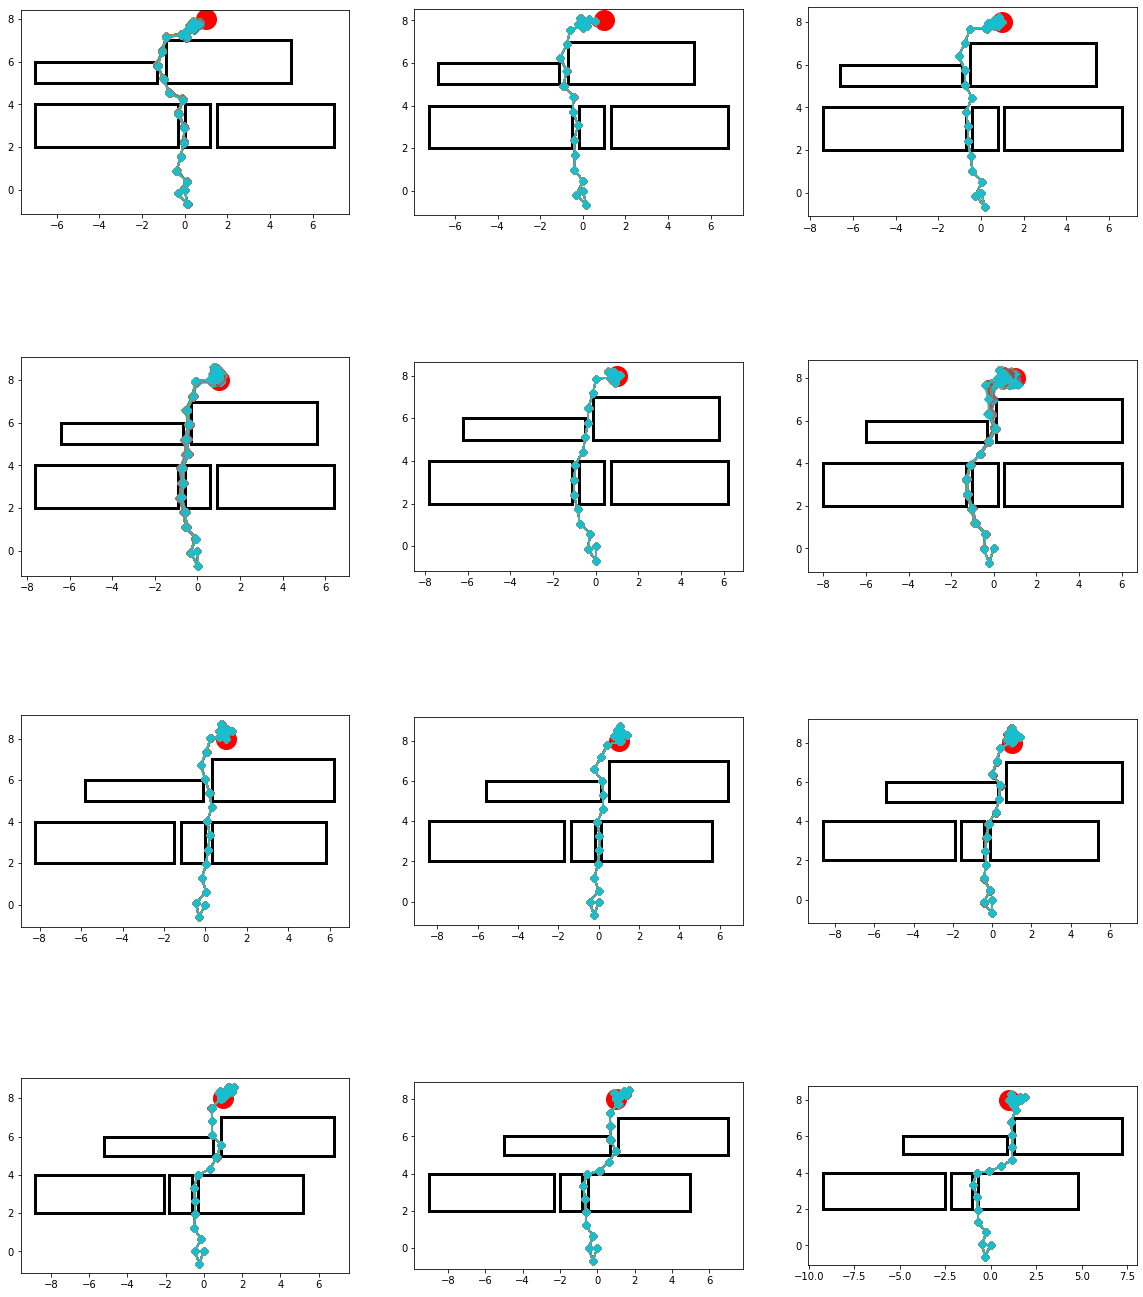

In [16]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1, :, 1] == 0.
    feasible_population = populations[-1, mask, :]
    feasible_populations.append(feasible_population)
    
draw_dynamic_solutions(feasible_populations, S, target, target_v, rectangles, rectangle_vs, np.arange(T), 
                       nrows=4, ncols=3, figsize=(20, 25))

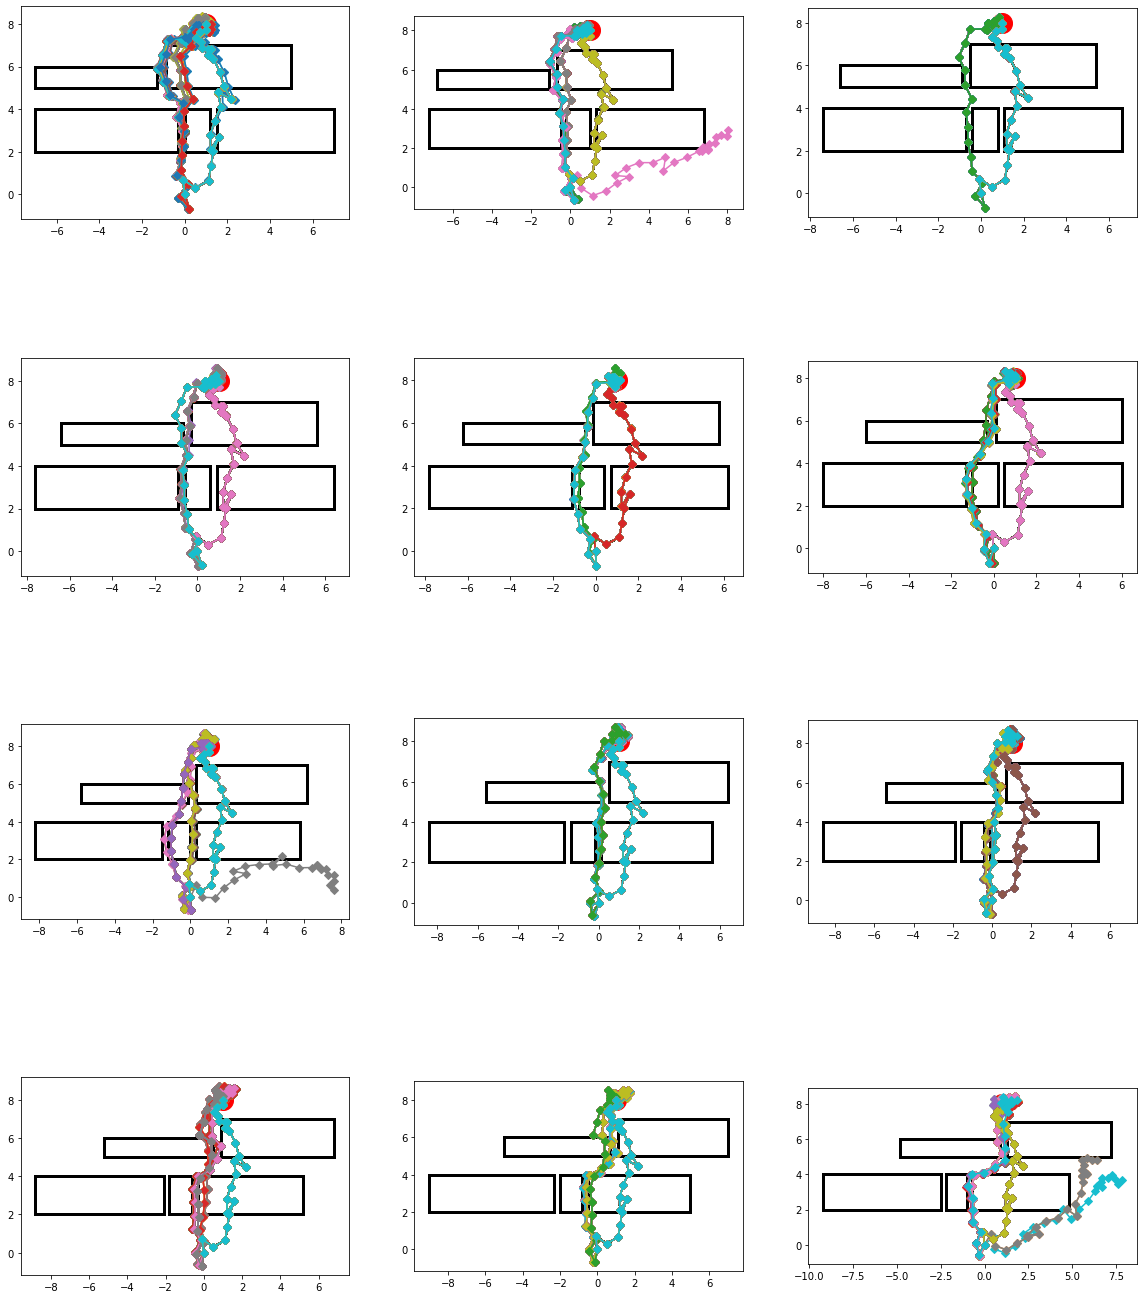

In [17]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1, :, 1] == 0.
    infeasible_population = populations[-1,~mask, :]
    infeasible_populations.append(infeasible_population)
    
draw_dynamic_solutions(infeasible_populations, S, target, target_v, rectangles, rectangle_vs, np.arange(T), 
                       nrows=4, ncols=3, figsize=(20, 25))